In [61]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

# Visualizations

In [63]:
import os
import pandas as pd

from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.custom_classes.experiments_visualizer import ExperimentsVisualizer

## Initialize Configs

In [64]:
EXPERIMENT_NAME = 'stress_testing_nulls'
DB_COLLECTION_NAME = f'{EXPERIMENT_NAME}_results'
DATASET_NAME = 'Folktables_GA_2018'
# EXPERIMENT_SESSION_UUID = 'c53d250b-5ba9-4d91-a444-ed7eb7919de5'
EXPERIMENT_SESSION_UUID = 'e38b6e20-e4e7-4791-89d3-5e371513d2ea'
SENSITIVE_ATTRS = ['SEX', 'RAC1P', 'AGEP', 'SEX&RAC1P&AGEP']
# PREPROCESSING_TECHNIQUES = ['cat: mode, num: median', 'cat: mode_trimmed_0.3, num: median']
PREPROCESSING_TECHNIQUES = ['cat: mode, num: median', 'cat: mode_trimmed_0.3, num: median']

In [65]:
# MODEL_NAMES = ['DecisionTreeClassifier', 'LogisticRegression', 'RandomForestClassifier',
#                'XGBClassifier', 'KNeighborsClassifier', 'MLPClassifier']
MODEL_NAMES = ['DecisionTreeClassifier', 'LogisticRegression']

In [66]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [67]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [68]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(896, 27)

In [69]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].head(20)

,Metric,Bootstrap_Model_Seed,Model_Name,Model_Params,Run_Number,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,...,Injector_Config_Lst,AGEP_dis,AGEP_priv,RAC1P_dis,RAC1P_priv,SEX&RAC1P&AGEP_dis,SEX&RAC1P&AGEP_priv,SEX_dis,SEX_priv,overall
0,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,0,OK,2023-04-23 17:11:44.366,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.765870,0.809802,0.763658,0.778347,0.735772,0.924528,0.739710,0.808493,0.7734
1,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,0,OK,2023-04-23 17:31:54.491,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.765870,0.809802,0.763658,0.778347,0.735772,0.924528,0.739710,0.808493,0.7734
2,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,1,OK,2023-04-23 17:11:44.377,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.765629,0.809802,0.763064,0.778347,0.734417,0.924528,0.739318,0.808493,0.7732
3,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,1,OK,2023-04-23 17:31:54.502,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.765870,0.809802,0.763658,0.778347,0.735772,0.924528,0.739710,0.808493,0.7734
4,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,2,OK,2023-04-23 17:11:44.387,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.765629,0.809802,0.763064,0.778347,0.734417,0.924528,0.739318,0.808493,0.7732
5,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,2,OK,2023-04-23 17:31:54.513,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.763698,0.807468,0.761283,0.776236,0.734417,0.920755,0.738142,0.805635,0.7712
6,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,3,OK,2023-04-23 17:11:44.397,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.765146,0.809802,0.763064,0.777744,0.734417,0.924528,0.738926,0.808085,0.7728
7,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,3,OK,2023-04-23 17:31:54.526,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.759836,0.810968,0.755938,0.775030,0.726287,0.928302,0.733046,0.805635,0.7686
8,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,4,OK,2023-04-23 17:11:44.409,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.765387,0.810968,0.763064,0.778347,0.734417,0.928302,0.739318,0.808493,0.7732
9,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,4,OK,2023-04-23 17:31:54.537,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.756939,0.813302,0.756532,0.771713,0.727642,0.928302,0.732262,0.802368,0.7666


In [70]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct()

In [71]:
exp_subgroup_metrics_dct['DecisionTreeClassifier']['cat: mode_trimmed_0.3, num: median']['Exp_iter_1'][0.0].head(100)

,Metric,Bootstrap_Model_Seed,Model_Name,Model_Params,Run_Number,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,...,Injector_Config_Lst,AGEP_dis,AGEP_priv,RAC1P_dis,RAC1P_priv,SEX&RAC1P&AGEP_dis,SEX&RAC1P&AGEP_priv,SEX_dis,SEX_priv,overall
0,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,0,OK,2023-04-23 17:11:44.366,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.765870,0.809802,0.763658,0.778347,0.735772,0.924528,0.739710,0.808493,0.773400
28,Accuracy,102,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,Folktables_GA_2018,10,0,OK,2023-04-23 17:13:00.356,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.770456,0.810968,0.764252,0.784077,0.745257,0.928302,0.756958,0.798693,0.777400
112,Entropy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,0,OK,2023-04-23 17:11:44.366,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.000000,0.000000,0.172773,0.000000,0.000000,0.000000,0.000000,0.168795,0.000000
140,Entropy,102,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,Folktables_GA_2018,10,0,OK,2023-04-23 17:13:00.356,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.000000,0.000000,0.181733,0.000000,0.000000,0.000000,0.000000,0.210410,0.000000
224,F1,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,0,OK,2023-04-23 17:11:44.366,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.789314,0.884806,0.804134,0.815651,0.767580,0.957265,0.780132,0.843615,0.811763
252,F1,102,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,Folktables_GA_2018,10,0,OK,2023-04-23 17:13:00.356,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.792313,0.885915,0.803563,0.820010,0.770171,0.959488,0.788251,0.839466,0.814469
336,FNR,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,0,OK,2023-04-23 17:11:44.366,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.144136,0.051515,0.107104,0.129550,0.129730,0.038627,0.116279,0.127586,0.122170
364,FNR,102,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,Folktables_GA_2018,10,0,OK,2023-04-23 17:13:00.356,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.145549,0.046970,0.112568,0.126874,0.148649,0.034335,0.134284,0.111034,0.122170
448,FPR,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,0,OK,2023-04-23 17:11:44.366,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.328713,0.654822,0.390117,0.340470,0.399457,0.343750,0.417898,0.284284,0.357691
476,FPR,102,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,Folktables_GA_2018,10,0,OK,2023-04-23 17:13:00.356,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.317822,0.664975,0.382315,0.330801,0.361413,0.343750,0.362069,0.332332,0.348669


In [72]:
exp_avg_group_metrics_dct = exp_composer.compose_group_metrics(exp_subgroup_metrics_dct)

In [73]:
exp_avg_group_metrics_dct['DecisionTreeClassifier']['cat: mode_trimmed_0.3, num: median']['Exp_iter_1'][0.5].head(100)

,Metric,SEX,RAC1P,AGEP,SEX&RAC1P&AGEP,Model_Name
0,Equalized_Odds_TPR,-0.015323,0.019368,-0.090254,-0.109384,DecisionTreeClassifier
1,Equalized_Odds_FPR,0.066975,0.060462,-0.324817,0.032609,DecisionTreeClassifier
2,Disparate_Impact,1.108390,1.080810,1.034504,1.238381,DecisionTreeClassifier
3,Statistical_Parity_Difference,0.122257,0.093399,0.039889,0.244519,DecisionTreeClassifier
4,Accuracy_Parity,-0.056231,-0.021797,-0.049684,-0.203078,DecisionTreeClassifier
5,Label_Stability_Ratio,1.088894,0.981309,0.888773,0.908848,DecisionTreeClassifier
6,IQR_Parity,-0.080311,0.010355,0.009769,-0.037531,DecisionTreeClassifier
7,Std_Parity,-0.036547,0.005040,0.017486,-0.004637,DecisionTreeClassifier
8,Std_Ratio,0.715243,1.046663,1.183653,0.953875,DecisionTreeClassifier
9,Jitter_Parity,-0.034792,0.013382,0.076040,0.075223,DecisionTreeClassifier


## Metrics Visualization and Reporting

In [74]:
visualizer = ExperimentsVisualizer(exp_subgroup_metrics_dct=exp_subgroup_metrics_dct,
                                   exp_avg_runs_group_metrics_dct=exp_avg_group_metrics_dct,
                                   dataset_name=DATASET_NAME,
                                   model_names=MODEL_NAMES,
                                   sensitive_attrs=SENSITIVE_ATTRS)

In [75]:
visualizer.melted_exp_avg_runs_subgroup_metrics_dct[MODEL_NAMES[0]][PREPROCESSING_TECHNIQUES[0]]['Exp_iter_2'][0.5]

,Metric,Model_Name,Num_Estimators,Test_Set_Index,Dataset_Split_Seed,Model_Init_Seed,Subgroup,Metric_Value
0,Accuracy,DecisionTreeClassifier,10.0,6.0,200.0,200.0,AGEP_dis,0.724458
1,Entropy,DecisionTreeClassifier,10.0,6.0,200.0,200.0,AGEP_dis,0.000000
2,F1,DecisionTreeClassifier,10.0,6.0,200.0,200.0,AGEP_dis,0.760496
3,FNR,DecisionTreeClassifier,10.0,6.0,200.0,200.0,AGEP_dis,0.169259
4,FPR,DecisionTreeClassifier,10.0,6.0,200.0,200.0,AGEP_dis,0.393839
...,...,...,...,...,...,...,...,...
139,Positive-Rate,DecisionTreeClassifier,10.0,6.0,200.0,200.0,overall,1.196473
140,Selection-Rate,DecisionTreeClassifier,10.0,6.0,200.0,200.0,overall,0.671700
141,Std,DecisionTreeClassifier,10.0,6.0,200.0,200.0,overall,0.054810
142,TNR,DecisionTreeClassifier,10.0,6.0,200.0,200.0,overall,0.562472


In [76]:
visualizer.melted_exp_avg_runs_group_metrics_dct[MODEL_NAMES[0]][PREPROCESSING_TECHNIQUES[0]]['Exp_iter_2'][0.3].head(1000)

,Metric,Model_Name,Group,Metric_Value
0,Equalized_Odds_TPR,DecisionTreeClassifier,SEX,0.062561
1,Equalized_Odds_FPR,DecisionTreeClassifier,SEX,0.081624
2,Disparate_Impact,DecisionTreeClassifier,SEX,1.262162
3,Statistical_Parity_Difference,DecisionTreeClassifier,SEX,0.274507
4,Accuracy_Parity,DecisionTreeClassifier,SEX,-0.029607
5,Label_Stability_Ratio,DecisionTreeClassifier,SEX,1.009678
6,IQR_Parity,DecisionTreeClassifier,SEX,0.004029
7,Std_Parity,DecisionTreeClassifier,SEX,-0.009040
8,Std_Ratio,DecisionTreeClassifier,SEX,0.850156
9,Jitter_Parity,DecisionTreeClassifier,SEX,-0.009535


### Subgroup metrics per dataset, experiment iteration, and model

In [91]:
visualizer.create_subgroups_grid_pct_lines_plot(model_name=MODEL_NAMES[0],
                                                target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                subgroup_metrics_type='variance')

alt.VConcatChart(...)

In [94]:
visualizer.create_subgroups_grid_pct_lines_plot(model_name=MODEL_NAMES[0],
                                                target_preprocessing_technique=PREPROCESSING_TECHNIQUES[1],
                                                subgroup_metrics_type='error')

alt.VConcatChart(...)

### Group metrics per dataset and model

In [79]:
visualizer.create_groups_grid_pct_lines_plot(model_name=MODEL_NAMES[0],
                                             target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                             group_metrics_type='variance')

alt.VConcatChart(...)

In [80]:
visualizer.create_groups_grid_pct_lines_plot(model_name=MODEL_NAMES[0],
                                             target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                             group_metrics_type='fairness')

alt.VConcatChart(...)

### Specific subgroup metric per dataset and multiple models

In [81]:
visualizer.create_subgroups_grid_pct_lines_per_model_plot(subgroup_metric='Jitter',
                                                          target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                          model_names=MODEL_NAMES)

alt.VConcatChart(...)

In [82]:
visualizer.create_subgroups_grid_pct_lines_per_model_plot(subgroup_metric='F1',
                                                          target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                          model_names=MODEL_NAMES)

alt.VConcatChart(...)

### Specific group metric per dataset, experiment iteration, and multiple models

In [83]:
visualizer.create_groups_grid_pct_lines_per_model_plot(group_metric='Label_Stability_Ratio',
                                                       target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                       model_names=MODEL_NAMES[:2])

alt.VConcatChart(...)

In [84]:
visualizer.create_groups_grid_pct_lines_per_model_plot(group_metric='Disparate_Impact',
                                                       target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                       model_names=MODEL_NAMES[:2])

alt.VConcatChart(...)

### Specific subgroup metric per dataset, one model, and multiple preprocessing techniques

In [85]:
visualizer.create_subgroups_grid_pct_lines_per_model_and_preprocessing_plot(subgroup_metric='Jitter', model_name=MODEL_NAMES[0])

alt.VConcatChart(...)

In [96]:
visualizer.create_subgroups_grid_pct_lines_per_model_and_preprocessing_plot(subgroup_metric='Accuracy', model_name=MODEL_NAMES[0])

alt.VConcatChart(...)

### Box plots for subgroup metrics per model and experiment iteration

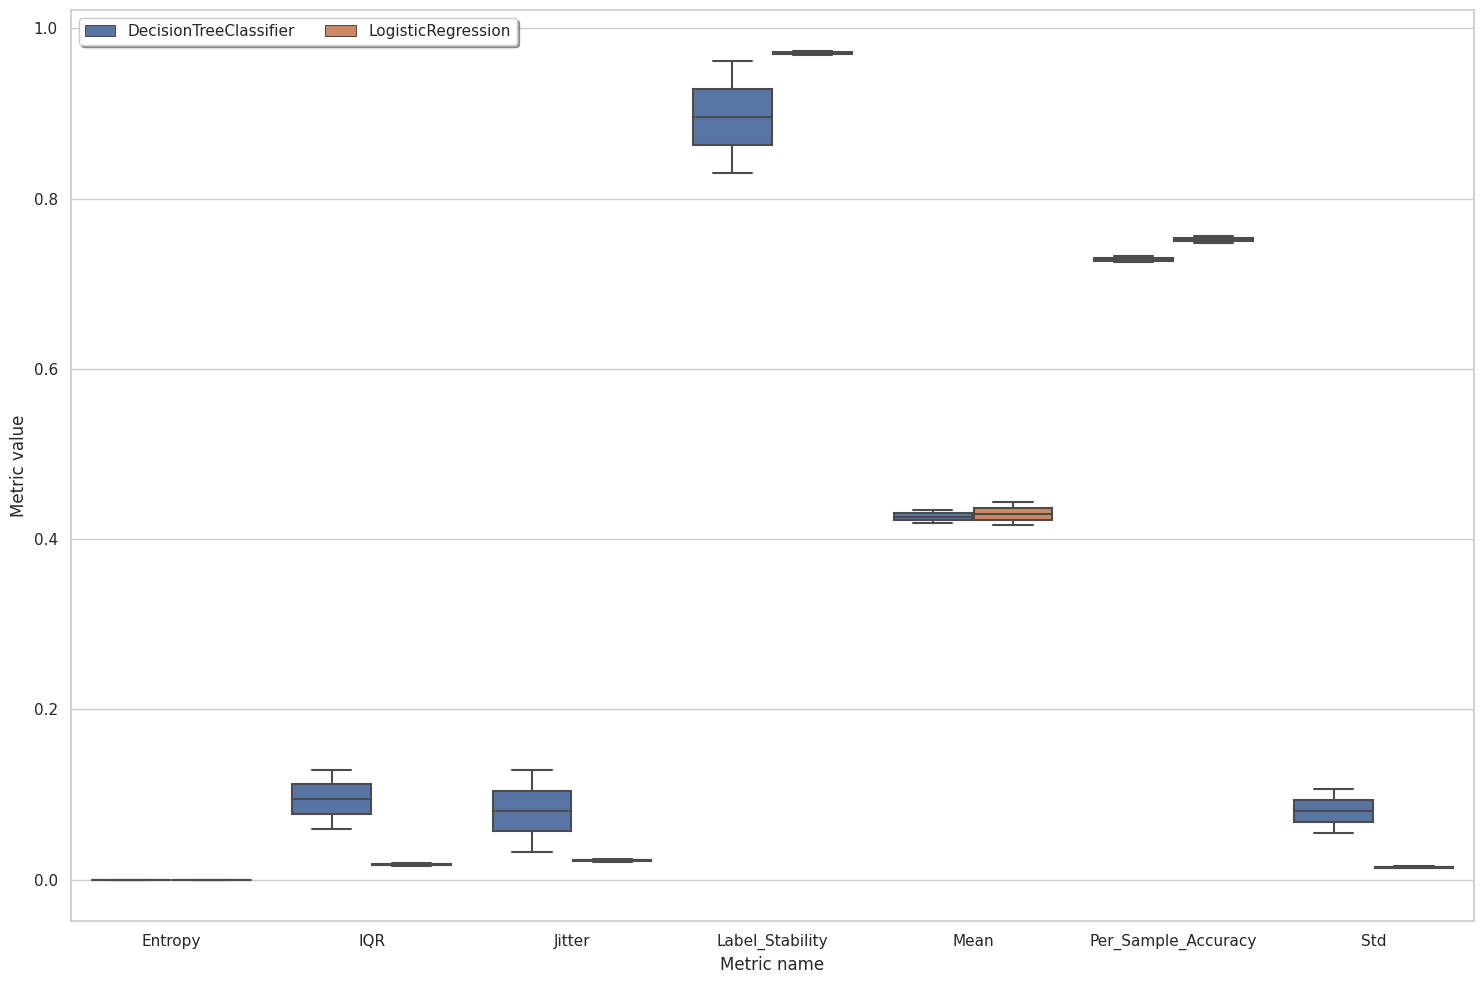

In [86]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_exp_iters(target_percentage=0.5,
                                                                   target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                   subgroup_metrics_type='variance')

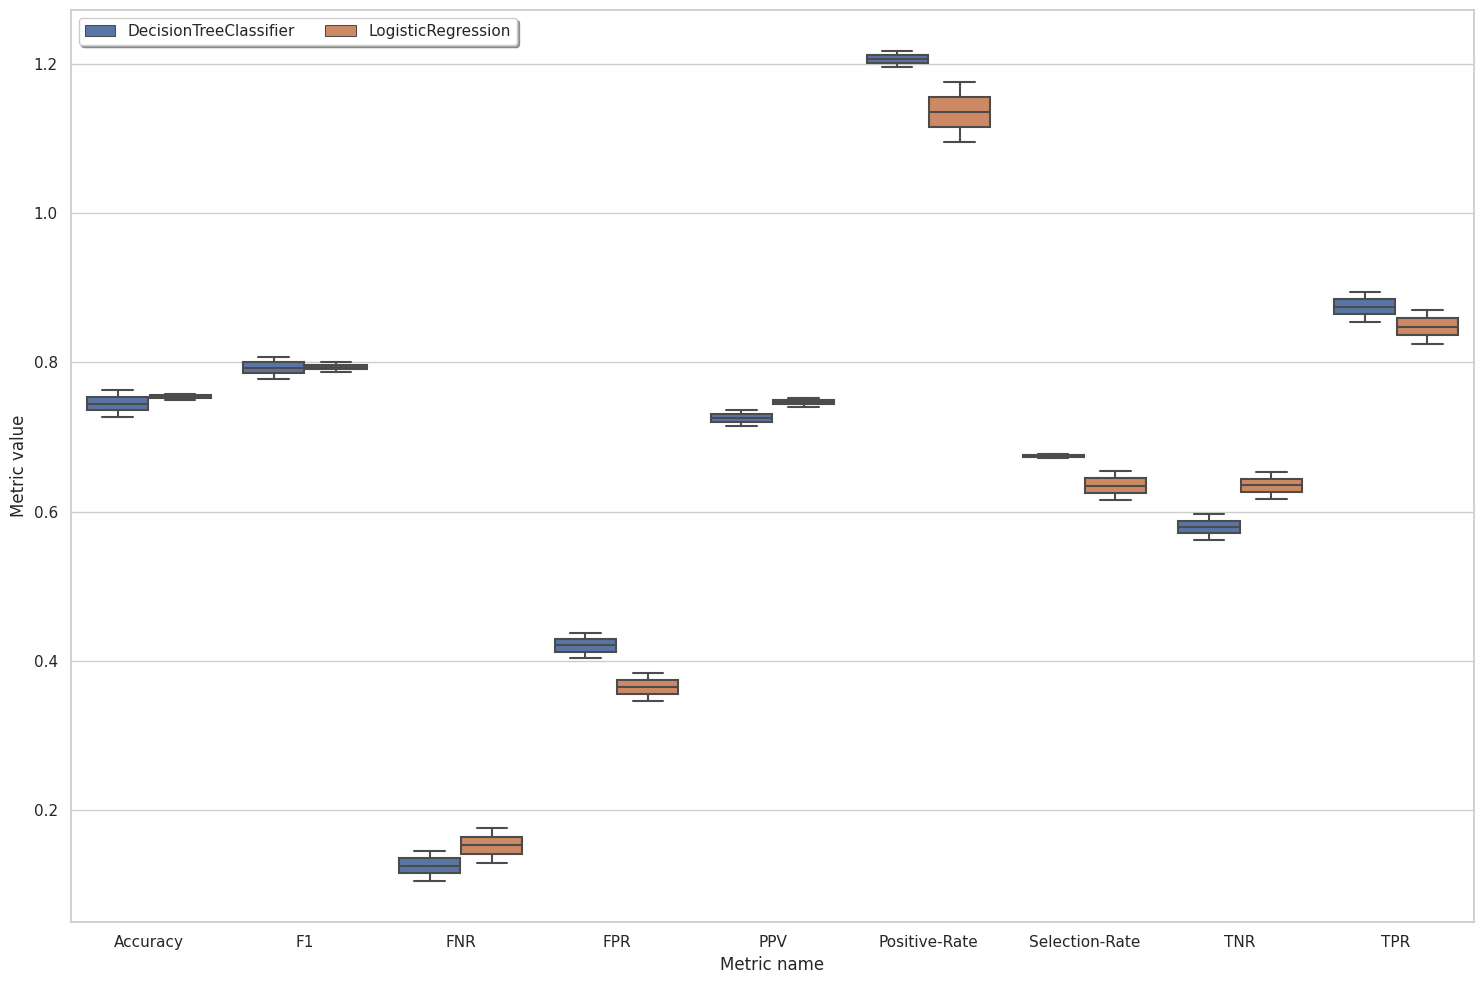

In [87]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_exp_iters(target_percentage=0.5,
                                                                   target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                   subgroup_metrics_type='error')

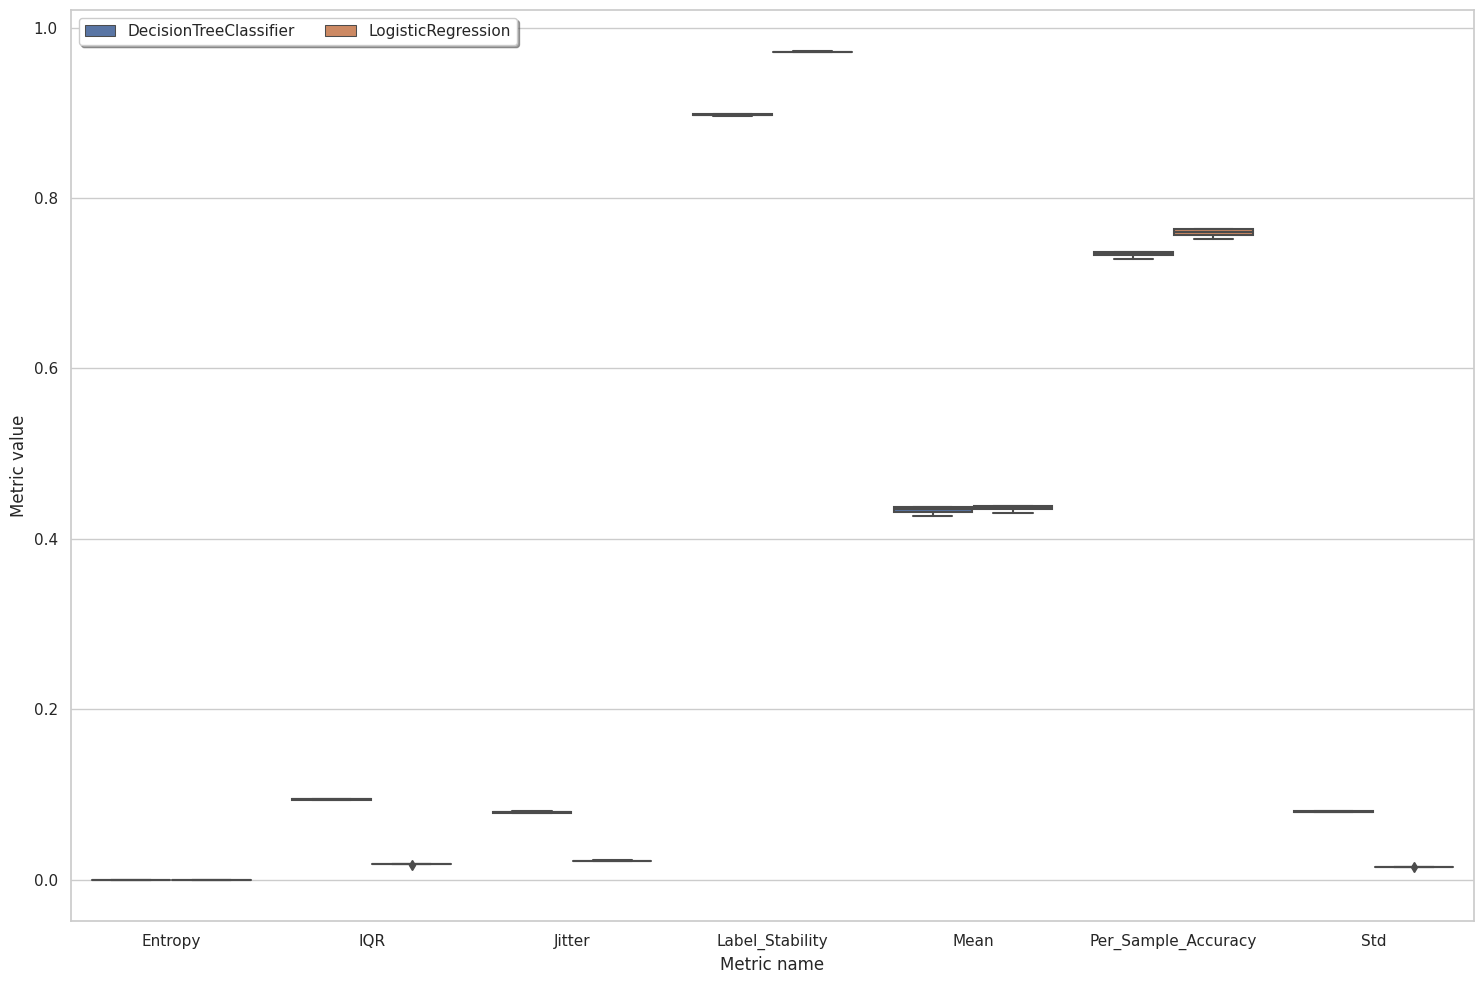

In [88]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                     subgroup_metrics_type='variance')

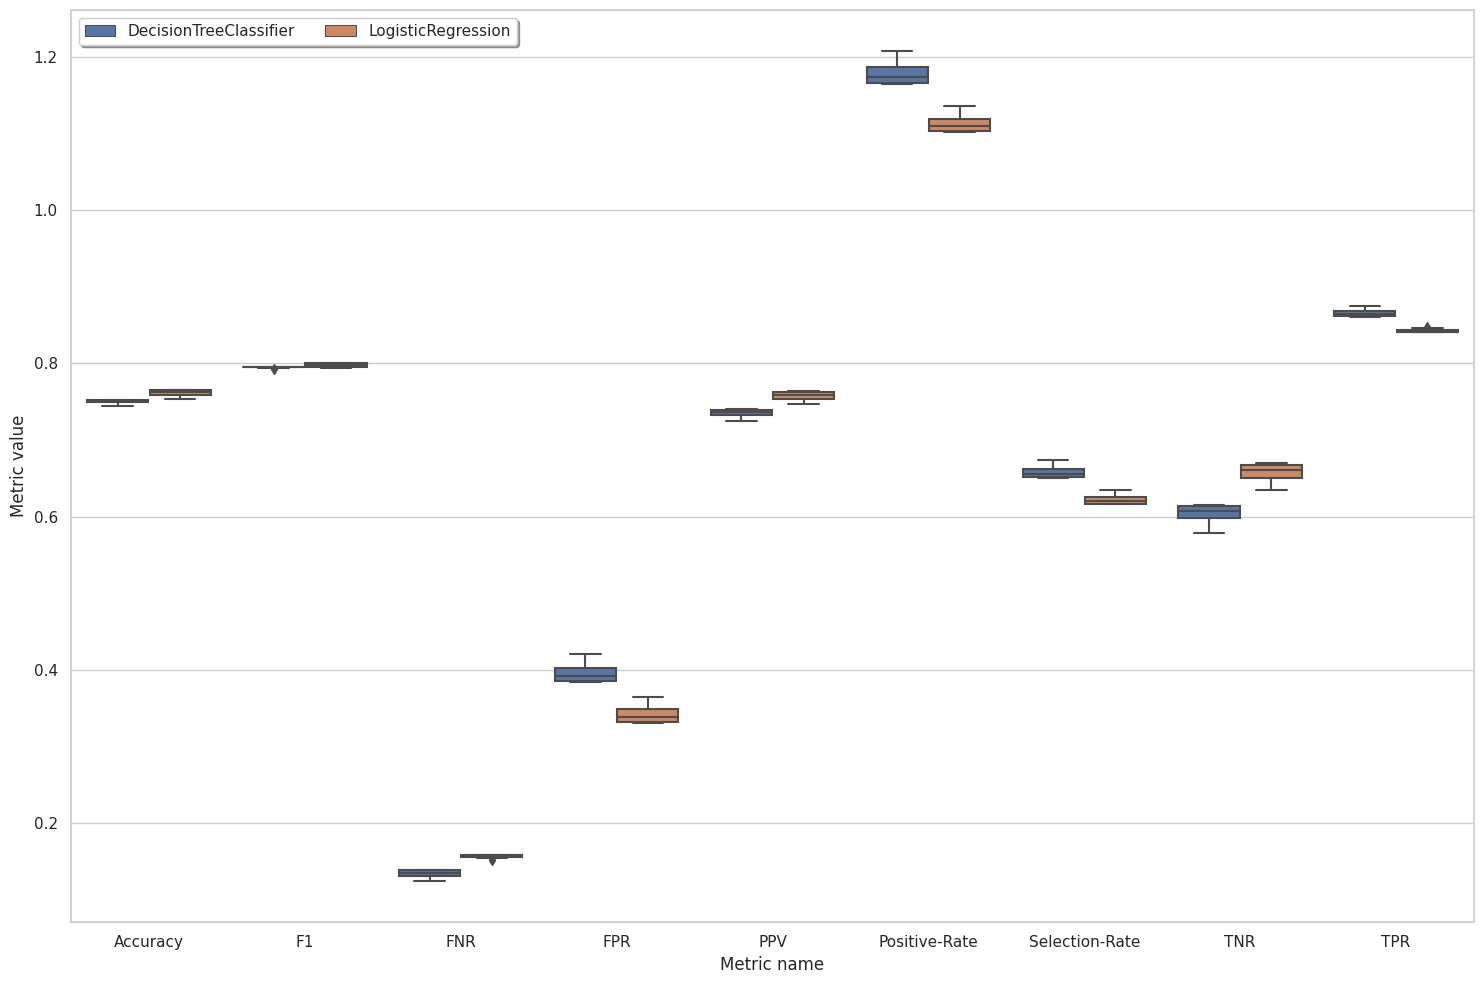

In [89]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                     subgroup_metrics_type='error')